# Derivation for the HSF Auto-scaling routine
The ultimate goal is to find the maximum relative velocity between two intersecting orbits

In [70]:
from sympy import *
init_printing()

In [71]:
r,e1,e2,cosf1,cosf2,a1,a2,m1,m2,G,M = symbols("r, e1, e2, f1, f2, a1, a2, m1, m2, G, M")

In [72]:
mu = G*M
n1 = sqrt(mu/(a1**3))
n2 = sqrt(mu/(a2**3))
v1 = sqrt(mu*(2/r - 1/a1))
v2 = sqrt(mu*(2/r - 1/a2))
cosf1 = (a1*(1-e1*e1)/r - 1)/e1
cosf2 = (a2*(1-e2*e2)/r - 1)/e2
sinf1 = -sqrt(1 - cosf1*cosf1)
sinf2 = sqrt(1 - cosf2*cosf2)
#v1_r = n1*a1/sqrt(1-e1*e1)*(e1*sinf1)       #can be +/-
#v2_r = n2*a2/sqrt(1-e2*e2)*(e2*sinf2)       #can be +/-
v1_phi = n1*a1/sqrt(1-e1*e1)*(1+e1*cosf1)
v2_phi = n2*a2/sqrt(1-e2*e2)*(1+e2*cosf2)

#v1_phi = n1*a1/sqrt(1-e1*e1)*(1+e1)
#v2_phi = n2*a2/sqrt(1-e2*e2)*(1+e2)
v1_r = -sqrt(v1*v1 - v1_phi*v1_phi)           #can be +/-
v2_r = sqrt(v2*v2 - v2_phi*v2_phi)           #can be +/-

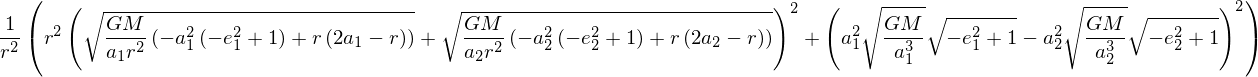

In [74]:
dv = (v1_phi - v2_phi)**2 + (v1_r - v2_r)**2
dv = simplify(dv)
dv

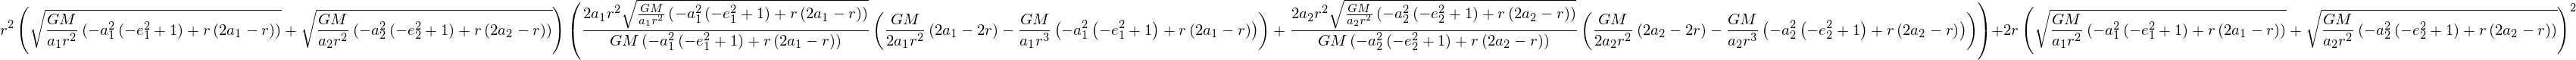

In [51]:
ddv = diff(dv,r)
ddv

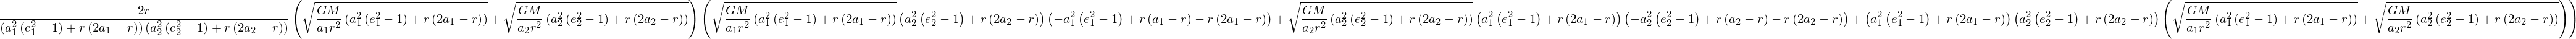

In [52]:
ddv = simplify(ddv)
ddv

In [44]:
#str(ddv)

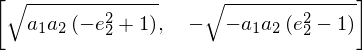

In [54]:
ddv_term1 = (a2/a1 - 1)*r**2 + (a2**2*(e2**2 - 1) - a2*a1*(e2**2 - 1))
r_sol_1 = solve(ddv_term1,r)
r_sol_1

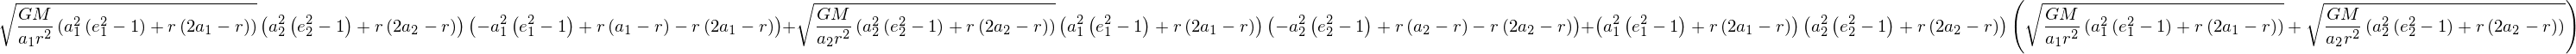

In [19]:
#can't find a solution to this
ddv_term2 = (sqrt(G*M*(a1**2*(e1**2 - 1) + r*(2*a1 - r))/(a1*r**2))*(a2**2*(e2**2 - 1) + r*(2*a2 - r))*(-a1**2*(e1**2 - 1) + r*(a1 - r) - r*(2*a1 - r)) + sqrt(G*M*(a2**2*(e2**2 - 1) + r*(2*a2 - r))/(a2*r**2))*(a1**2*(e1**2 - 1) + r*(2*a1 - r))*(-a2**2*(e2**2 - 1) + r*(a2 - r) - r*(2*a2 - r)) + (a1**2*(e1**2 - 1) + r*(2*a1 - r))*(a2**2*(e2**2 - 1) + r*(2*a2 - r))*(sqrt(G*M*(a1**2*(e1**2 - 1) + r*(2*a1 - r))/(a1*r**2)) + sqrt(G*M*(a2**2*(e2**2 - 1) + r*(2*a2 - r))/(a2*r**2))))
ddv_term2

In [8]:
#True solution, term 1 and 2
t1 = 2*G*M*(sqrt(-G*M*(-a1**2*(e1**2 - 1) - r*(2*a1 - r))/(a1*r**2))*(a2*(e2**2 - 1) + r) + sqrt(-G*M*(-a2**2*(e2**2 - 1) - r*(2*a2 - r))/(a2*r**2))*(a1*(e1**2 - 1) + r))*(sqrt(-G*M*(-a1**2*(e1**2 - 1) - r*(2*a1 - r))/(a1*r**2)) + sqrt(-G*M*(-a2**2*(e2**2 - 1) - r*(2*a2 - r))/(a2*r**2)))
t2 = 2*sqrt(-G*M*(-a1**2*(e1**2 - 1) - r*(2*a1 - r))/(a1*r**2))*sqrt(-G*M*(-a2**2*(e2**2 - 1) - r*(2*a2 - r))/(a2*r**2))*(a1**2*sqrt(G*M/a1**3)*sqrt(-e1**2 + 1) - a2**2*sqrt(G*M/a2**3)*sqrt(-e2**2 + 1))**2

#e1 == e2 << 1 - doesn't work!
t3 = G*M*(sqrt(-G*M*(a1**2 - r*(2*a1 - r))/(a1*r**2))*(a2 - r) + sqrt(-G*M*(a2**2 - r*(2*a2 - r))/(a2*r**2))*(a1 - r))*(sqrt(-G*M*(a1**2 - r*(2*a1 - r))/(a1*r**2)) + sqrt(-G*M*(a2**2 - r*(2*a2 - r))/(a2*r**2)))
t4 = sqrt(-G*M*(a1**2 - r*(2*a1 - r))/(a1*r**2))*sqrt(-G*M*(a2**2 - r*(2*a2 - r))/(a2*r**2))*(a1**2*sqrt(G*M/a1**3) - a2**2*sqrt(G*M/a2**3))**2

# Plotting Stuff
From plotting a few simple cases, it looks like just doing v1 - v2 (i.e. a 1-D velocity solution) has no max/min solution

In [56]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

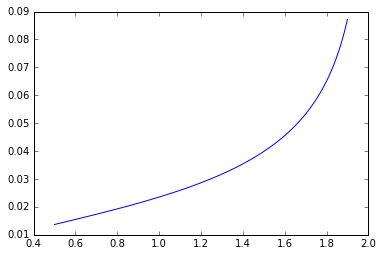

In [57]:
#1-d case - no min/max solution, the further out the greater relative velocity
a1 = 1
a2 = 1.05
r = np.linspace(0.5,1.9,100)
dv = np.sqrt(2/r - 1/a2) - np.sqrt(2/r - 1/a1)
plt.plot(r,dv)

/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in sqrt
/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in sqrt
/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt
/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in sqrt


dv_max =1.1397906303 , r_sol=0.887411967465


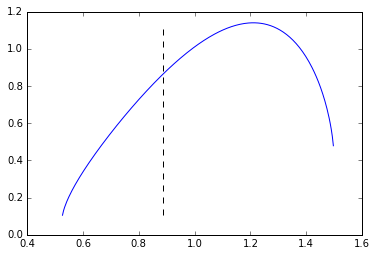

In [67]:
#2-d case - maximum exists
G = 1
M = 1
mu = G*M
a1 = 1.
a2 = 1.05
e1 = 0.5
e2 = 0.5
min_ = 0.1
max_ = 2
r = np.linspace(min_,max_,500)

n1 = np.sqrt(mu/(a1**3))
n2 = np.sqrt(mu/(a2**3))
cosf1 = (a1*(1-e1*e1)/r - 1)/e1
cosf2 = (a2*(1-e2*e2)/r - 1)/e2
sinf1 = -np.sqrt(1 - cosf1*cosf1)         #these are +/-
sinf2 = np.sqrt(1 - cosf2*cosf2)        #these are +/-
v1_phi = n1*a1/np.sqrt(1-e1*e1)*(1+e1*cosf1)
v2_phi = n2*a2/np.sqrt(1-e2*e2)*(1+e2*cosf2)
#v1_r = n1*a1/np.sqrt(1-e1*e1)*(e1*sinf1)
#v2_r = n2*a2/np.sqrt(1-e2*e2)*(e2*sinf2)
v1_r = -np.sqrt(mu*(2/r - 1/a1) - v1_phi*v1_phi)
v2_r = np.sqrt(mu*(2/r - 1/a2) - v2_phi*v2_phi)

dv = r*r*(np.sqrt((v1_phi - v2_phi)**2 + (v1_r - v2_r)**2))
dv_real = dv[np.isnan(dv) == False]
r_sol = np.sqrt(-a1*a2*(e2-1)*(e2+1))  #one solution to d(r**2*dv)/dr = 0, muck
#r_sol2 = 2*a1*a2/(a1 + a2) - np.sqrt(a1*a2*(a1**2*e1**2 - a1**2 + a1*a2*e1**2 + a1*a2*e2**2 + 2*a1*a2 + a2**2*e2**2 - a2**2))/(a1 + a2)
#r_sol3 = 2*a1*a2/(a1 + a2) + np.sqrt(a1*a2*(a1**2*e1**2 - a1**2 + a1*a2*e1**2 + a1*a2*e2**2 + 2*a1*a2 + a2**2*e2**2 - a2**2))/(a1 + a2)
r_sol4 = np.sqrt((a2**2*(e2**2 - 1) - a2*a1*(e1**2 - 1))/(1 - a2/a1))

plt.plot(r,dv);
plt.plot([r_sol4,r_sol4],[min(dv_real),max(dv_real)], 'k--')
print "dv_max ="+str(max(dv_real)), ", r_sol="+str(r_sol4)

/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


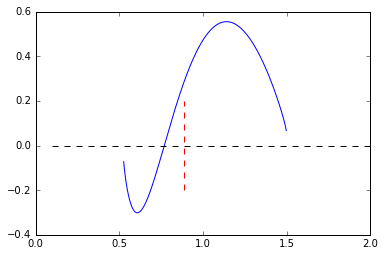

In [68]:
#find where ddv = 0
term1 = 2*G*M*(np.sqrt(-G*M*(-a1**2*(e1**2 - 1) - r*(2*a1 - r))/(a1*r**2))*(a2*(e2**2 - 1) + r) + np.sqrt(-G*M*(-a2**2*(e2**2 - 1) - r*(2*a2 - r))/(a2*r**2))*(a1*(e1**2 - 1) + r))*(np.sqrt(-G*M*(-a1**2*(e1**2 - 1) - r*(2*a1 - r))/(a1*r**2)) + np.sqrt(-G*M*(-a2**2*(e2**2 - 1) - r*(2*a2 - r))/(a2*r**2)))
term2 = 2*np.sqrt(-G*M*(-a1**2*(e1**2 - 1) - r*(2*a1 - r))/(a1*r**2))*np.sqrt(-G*M*(-a2**2*(e2**2 - 1) - r*(2*a2 - r))/(a2*r**2))*(a1**2*np.sqrt(G*M/a1**3)*np.sqrt(-e1**2 + 1) - a2**2*np.sqrt(G*M/a2**3)*np.sqrt(-e2**2 + 1))**2
ddv_true = term1 + term2

plt.plot(r,ddv_true)
plt.plot([min_,max_],[0,0],'k--')
plt.plot([r_sol4, r_sol4], [-0.2,0.2], 'r--')